In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import skimage.io
from  skimage.feature import canny




**Image segmentation using THRESHHOLD**

(Text(0.5, 1.0, 'thresh'), ([], []), ([], []))

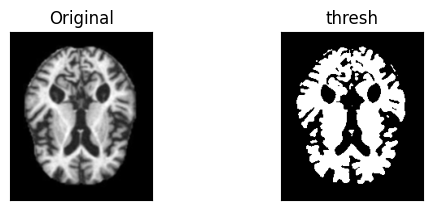

In [4]:
# loading image
img0 = cv2.imread('moderateDem14.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)
ret, thresh = cv2.threshold(img,105, 255, cv2.THRESH_BINARY)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])


**Canny edge detection using CV2**

**Canny Edge detection is an Algorithm consisting of 4 major steps:**
1.Reduce Noise using Gaussian Smoothing.
2.Compute image gradient using Sobel filter.
3.Apply Non-Max Suppression or NMS to just jeep the local maxima
4.Finally, apply Hysteresis thresholding which that 2 threshold values T_upper and T_lower which is used in the Canny() function.


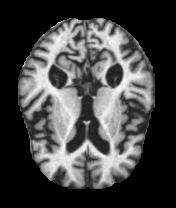

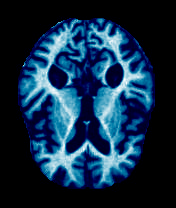

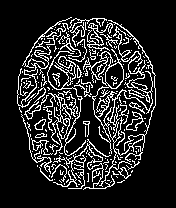

In [8]:
image = cv2.imread('moderateDem14.jpg', 0)
heatmap = cv2.applyColorMap(image, cv2.COLORMAP_OCEAN)
# any sharp edges in images are smoothed while minimizing too much blurring.
# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(heatmap, t_lower, t_upper)


cv2_imshow(image)
cv2.waitKey()
cv2_imshow(heatmap)
cv2.waitKey()
cv2_imshow(edge)




**Canny edge using SKIMAGE**

<class 'numpy.ndarray'>


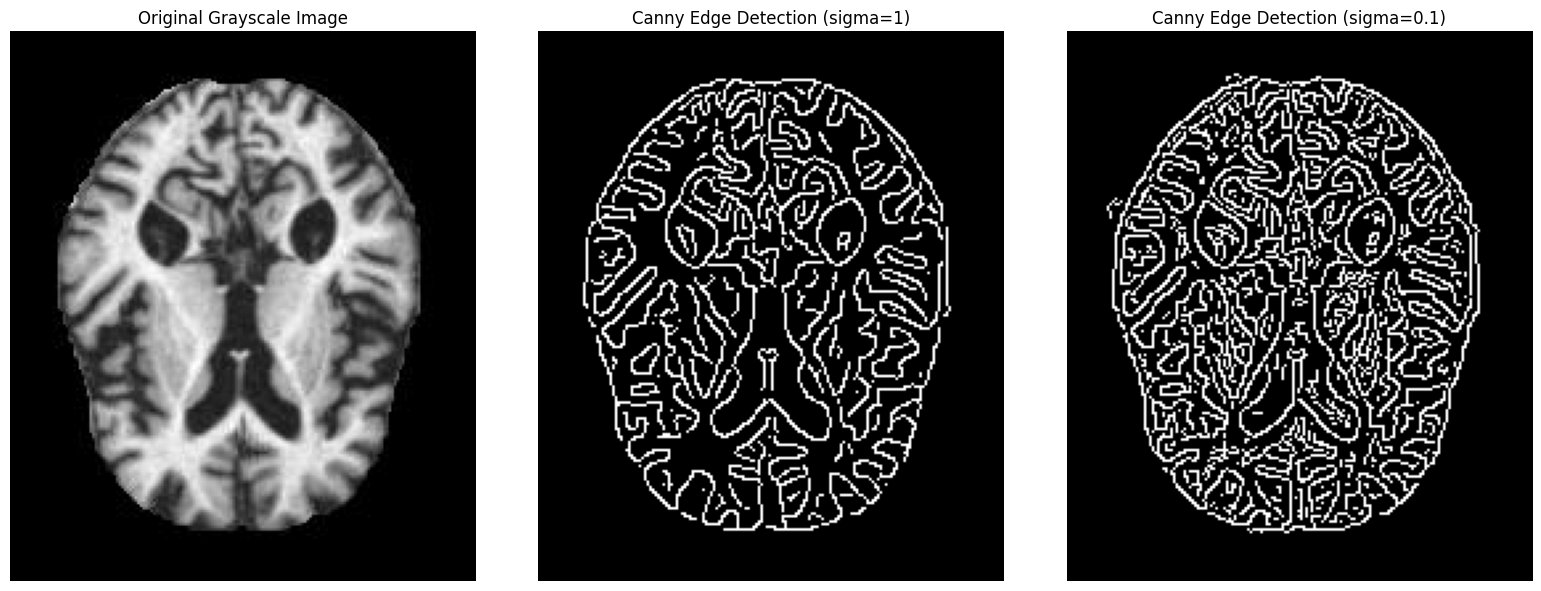

In [29]:
image = skimage.io.imread('moderateDem14.jpg')
print(type(image))
image.shape
canny_image_default = canny(image)
#Apply Canny with sigma=0.1
canny_image_tenth = canny(image, sigma=0.1)
#Plot figures
fig, ax = plt.subplots(ncols=3, figsize=(16, 14), sharex=True)
#Plot the original image
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Grayscale Image')
#Plot Canny filtered image with sigma=1
ax[1].imshow(canny_image_default, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection (sigma=1)')
#Plot Canny filtered image with sigma=0.1
ax[2].imshow(canny_image_tenth, cmap=plt.cm.gray)
ax[2].set_title('Canny Edge Detection (sigma=0.1)')
# ax[3].imshow(edge, cmap=plt.cm.gray)
# ax[3].set_title('edge')
plt.tight_layout()
for a in ax:
    a.axis('off')
plt.show()

<class 'numpy.ndarray'>


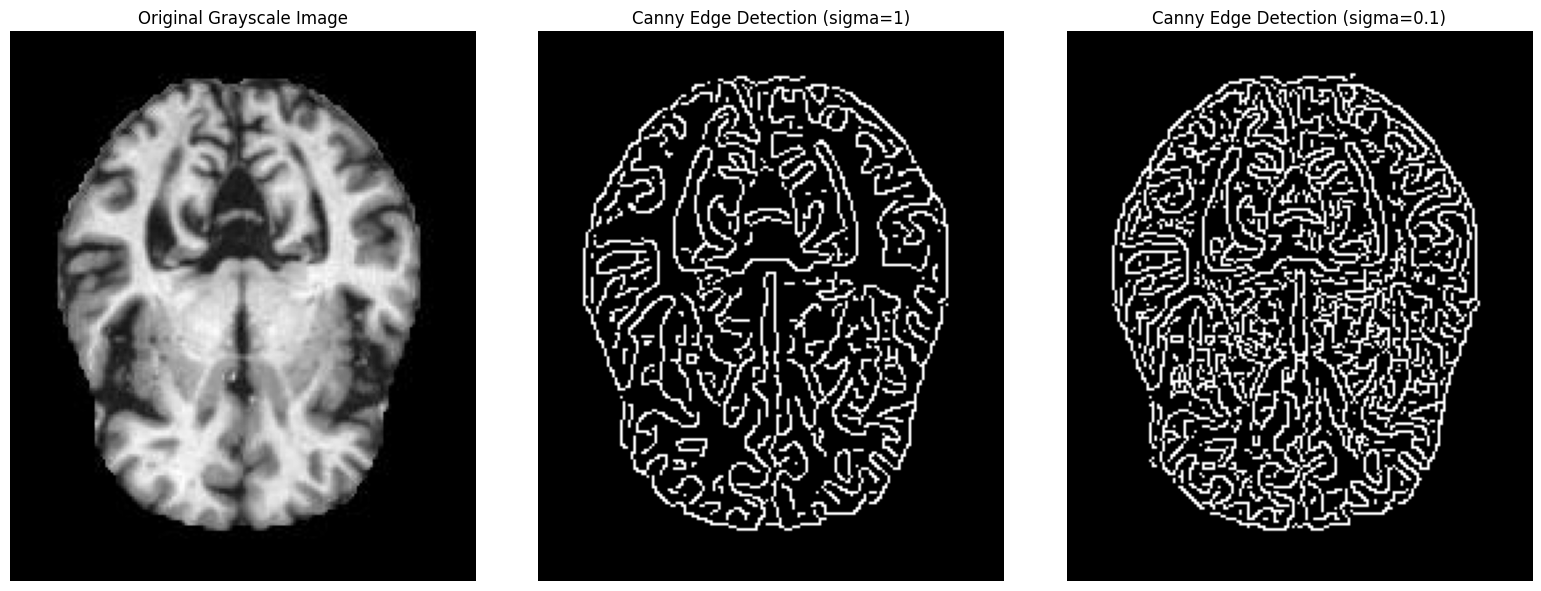

In [ ]:
image = skimage.io.imread('mildDem26.jpg')
print(type(image))
image.shape
# Turn candy image to grayscale.
# image_gray = skimage.color.rgb2gray(image)
canny_image_default = canny(image)
#Apply Canny with sigma=0.1
canny_image_tenth = canny(image, sigma=0.1)
#Plot figures
fig, ax = plt.subplots(ncols=3, figsize=(16, 14), sharex=True)
#Plot the original image
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Grayscale Image')
#Plot Canny filtered image with sigma=1
ax[1].imshow(canny_image_default, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection (sigma=1)')
#Plot Canny filtered image with sigma=0.1
ax[2].imshow(canny_image_tenth, cmap=plt.cm.gray)
ax[2].set_title('Canny Edge Detection (sigma=0.1)')

plt.tight_layout()
for a in ax:
    a.axis('off')
plt.show()

**Background. Cerebrospinal fluid (CSF) biomarkers are increasingly being used to support a diagnosis of Alzheimer's disease (AD).**
My purpose here is to extract the dominant colors in the images and highlight the CSF seperately.

For extracting dominant colors , i have used Kmeans clustering on the heat map of the image.

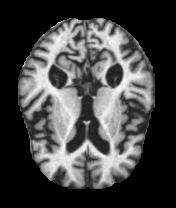

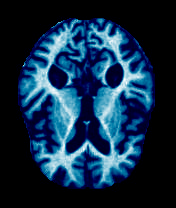

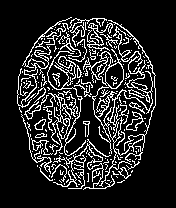

In [12]:
image = cv2.imread('moderateDem14.jpg', 0)
heatmap = cv2.applyColorMap(image, cv2.COLORMAP_OCEAN)
# any sharp edges in images are smoothed while minimizing too much blurring.
# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(heatmap, t_lower, t_upper)


cv2_imshow(image)
cv2.waitKey()
cv2_imshow(heatmap)
cv2.waitKey()
cv2_imshow(edge)




In [31]:
original_shape=heatmap.shape

In [32]:
# Flatten Each channel of the Image
all_pixels  = heatmap.reshape((-1,3))
print(all_pixels.shape)

(36608, 3)


In [33]:
dominant_colors = 3

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [34]:
centers = km.cluster_centers_
print(centers) # In RGB Format

[[ 1.48343675e+02  9.50100769e+01  6.56563246e+00]
 [ 2.13899741e+02  1.93385264e+02  1.31699222e+02]
 [ 1.67076275e+01  5.45011867e-01 -3.52784468e-12]]


In [35]:
# Convert to Integer format
centers = np.array(centers,dtype='uint8')

In [36]:
print(centers)

[[148  95   6]
 [213 193 131]
 [ 16   0   0]]


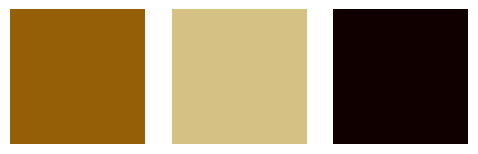

In [37]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

In [38]:
new_img = np.zeros((208*176,3),dtype='uint8')
print(new_img.shape)


(36608, 3)


In [39]:
colors

[array([148,  95,   6], dtype=uint8),
 array([213, 193, 131], dtype=uint8),
 array([16,  0,  0], dtype=uint8)]

In [40]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

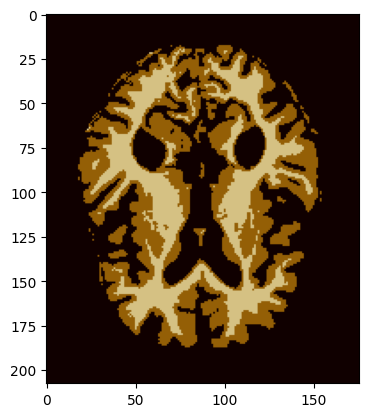

In [41]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

**Applying canny edge filter on this image**

In [42]:
print(type(new_img))
new_img.shape

<class 'numpy.ndarray'>


(208, 176, 3)

In [43]:
image_gray = skimage.color.rgb2gray(new_img)
canny_image_tenth = canny(image_gray, sigma=0.1)


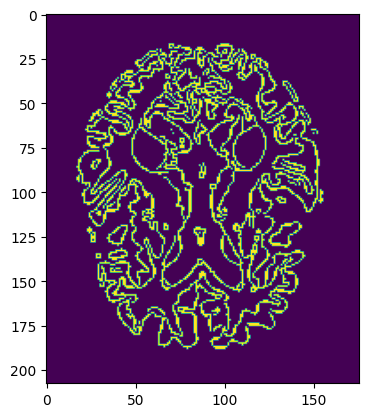

In [44]:
plt.imshow(canny_image_tenth)
plt.show()